In [1]:
%config Completer.use_jedi = False
import warnings

warnings.filterwarnings(action='ignore')

회귀 신경망 실습
신경망을 이용해 보스턴 집값 데이터를 활용해 보스턴 집값을 에측하는 모형을 만들어본다.

In [2]:
# 일관된 결과값이 나오도록 random seed를 설정한다.
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [3]:
# 데이터 불러오기
from sklearn import datasets  # 보스턴 집값 데이터를 사용하기 위해 import 한다.

raw_boston = datasets.load_boston()  # 보스턴 집값 데이터를 불러온다.

In [4]:
# 피쳐/타겟 데이터 지정
X = raw_boston.data  # 보스턴 집값 피쳐 데이터를 저장한다.
y = raw_boston.target  # 보스턴 집값 타겟 데이터를 저장한다.

In [5]:
# 피처 데이터 차원 확인
X.shape  # 결과를 확인하면 총 13개의 피쳐가 사용되는데, 이는 신경망을 생성할 때 사용된다.

(506, 13)

In [6]:
# 타겟 데이터 종류 확인
# 타겟 데이터 종류를 확인함으로써 분류 문제인지 아니면 회귀 문제인지 파악할 수 있고, 분류 문제라면 몇 가지 클래스로
# 구분되는지 알 수 있다.
set(y)

{5.0,
 5.6,
 6.3,
 7.0,
 7.2,
 7.4,
 7.5,
 8.1,
 8.3,
 8.4,
 8.5,
 8.7,
 8.8,
 9.5,
 9.6,
 9.7,
 10.2,
 10.4,
 10.5,
 10.8,
 10.9,
 11.0,
 11.3,
 11.5,
 11.7,
 11.8,
 11.9,
 12.0,
 12.1,
 12.3,
 12.5,
 12.6,
 12.7,
 12.8,
 13.0,
 13.1,
 13.2,
 13.3,
 13.4,
 13.5,
 13.6,
 13.8,
 13.9,
 14.0,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.6,
 14.8,
 14.9,
 15.0,
 15.1,
 15.2,
 15.3,
 15.4,
 15.6,
 15.7,
 16.0,
 16.1,
 16.2,
 16.3,
 16.4,
 16.5,
 16.6,
 16.7,
 16.8,
 17.0,
 17.1,
 17.2,
 17.3,
 17.4,
 17.5,
 17.6,
 17.7,
 17.8,
 17.9,
 18.0,
 18.1,
 18.2,
 18.3,
 18.4,
 18.5,
 18.6,
 18.7,
 18.8,
 18.9,
 19.0,
 19.1,
 19.2,
 19.3,
 19.4,
 19.5,
 19.6,
 19.7,
 19.8,
 19.9,
 20.0,
 20.1,
 20.2,
 20.3,
 20.4,
 20.5,
 20.6,
 20.7,
 20.8,
 20.9,
 21.0,
 21.1,
 21.2,
 21.4,
 21.5,
 21.6,
 21.7,
 21.8,
 21.9,
 22.0,
 22.1,
 22.2,
 22.3,
 22.4,
 22.5,
 22.6,
 22.7,
 22.8,
 22.9,
 23.0,
 23.1,
 23.2,
 23.3,
 23.4,
 23.5,
 23.6,
 23.7,
 23.8,
 23.9,
 24.0,
 24.1,
 24.2,
 24.3,
 24.4,
 24.5,
 24.6,
 24.7,
 

In [7]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split  # 트레이닝/테스트 데이터 분할을 위해 import 한다.

# 피쳐 데이터와 타겟 데이터를 트레이닝 데이터와 테스트 데이터로 분할한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)
X_tn.shape, X_te.shape

((379, 13), (127, 13))

In [8]:
# 시퀀스 API 신경망 생성
from keras.models import Sequential  # 시퀀스 API 신경망 생성하기 위해 import 한다.
from keras.layers import Dense  # 신경망에 추가할 layer를 생성하기 위해 import 한다.

n = X_tn.shape[1]  # 신경망에 사용되는 피쳐 개수를 저장한다.
e = 30  # 학습 횟수를 의미하는 epoch 값을 설정한다.

In [9]:
# Sequential()로 신경망 모형을 만들고 add() 함수를 이용해서 layer를 추가한다.
model = Sequential()  # 신경망 모델을 만든다.
# units 옵션으로 출력 차원, input_dim 옵션으로 입력 데이터(피쳐) 차원, activation 옵션으로 활설화 함수를 지정해서
# 입력 layer를 만든다.
model.add(Dense(units=20, input_dim=n, activation='relu'))  # 입력 layer를 만든다.
# 최종 출력은 집값을 예측하므로 1개의 노드로 출력된다.
# 회귀 문제를 풀 때 최종 활성화 함수는 활성화 함수 중 선형 함수를 사용해야 하는데, 코드 상에서 최종 활성화 함수를
# 지정하지 않으면 기본값으로 선형 함수가 적용된다.
model.add(Dense(units=1))  # 출력 layer를 만든다.
model.summary()

Metal device set to: Apple M2


2023-04-18 17:14:27.812409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-18 17:14:27.812966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모형 컴파일
# loss 옵션으로 손실 함수를 지정하고 optimizer 옵션으로 최적화 함수(optimizer)를 지정하고 metrics 옵션으로 평가
# 기준을 지정한다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [11]:
# 신경망 학습
# 트레이팅 데이터(X_tn), 트레이팅 데이터에 따른 타겟 데이터(y_tn), epoch, batch_size
hist = model.fit(X_tn, y_tn, epochs=e, batch_size=5)

Epoch 1/30


2023-04-18 17:14:28.294015: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-18 17:14:28.443530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


76/76 [==============================] - 1s 7ms/step - loss: 474.8161 - mean_squared_error: 474.8161
Epoch 2/30
76/76 [==============================] - 0s 3ms/step - loss: 97.4737 - mean_squared_error: 97.4737
Epoch 3/30
76/76 [==============================] - 0s 3ms/step - loss: 81.1660 - mean_squared_error: 81.1660
Epoch 4/30
76/76 [==============================] - 0s 3ms/step - loss: 72.6058 - mean_squared_error: 72.6058
Epoch 5/30
76/76 [==============================] - 0s 4ms/step - loss: 63.1071 - mean_squared_error: 63.1071
Epoch 6/30
76/76 [==============================] - 0s 3ms/step - loss: 57.3055 - mean_squared_error: 57.3055
Epoch 7/30
76/76 [==============================] - 0s 3ms/step - loss: 53.3248 - mean_squared_error: 53.3248
Epoch 8/30
76/76 [==============================] - 0s 3ms/step - loss: 48.0305 - mean_squared_error: 48.0305
Epoch 9/30
76/76 [==============================] - 0s 3ms/step - loss: 44.4123 - mean_squared_error: 44.4123
Epoch 10/30
76/76 [

In [12]:
# 학습 평가
print(model.evaluate(X_tn, y_tn))  # 트레이닝 데이터 학습 평가
print(model.evaluate(X_te, y_te))  # 테스트 데이터 학습 평가

12/12 [==============================] - 0s 3ms/step - loss: 51.5558 - mean_squared_error: 51.5558
[51.55582809448242, 51.55582809448242]
4/4 [==============================] - 0s 6ms/step - loss: 73.9727 - mean_squared_error: 73.9727
[73.97268676757812, 73.97268676757812]


2023-04-18 17:14:37.013720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [13]:
# 정확도 및 손실 정도 시각화 준비
epoch = np.arange(1, e + 1)
print(epoch)
mse = hist.history['mean_squared_error']
print(mse)
loss = hist.history['loss']
print(loss)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[474.81610107421875, 97.47367858886719, 81.16602325439453, 72.60582733154297, 63.10708236694336, 57.305538177490234, 53.32482147216797, 48.030452728271484, 44.41228485107422, 44.62456130981445, 39.885379791259766, 37.46772766113281, 37.210052490234375, 34.657981872558594, 35.22400665283203, 37.256927490234375, 36.62006759643555, 35.410614013671875, 33.907806396484375, 34.47383499145508, 36.57756423950195, 35.87944793701172, 34.44242858886719, 35.37887954711914, 33.260345458984375, 36.97322463989258, 31.0006103515625, 34.85824966430664, 32.476993560791016, 31.690673828125]
[474.81610107421875, 97.47367858886719, 81.16602325439453, 72.60582733154297, 63.10707473754883, 57.305538177490234, 53.32482147216797, 48.030452728271484, 44.41228485107422, 44.62456130981445, 39.885379791259766, 37.46772384643555, 37.210052490234375, 34.657981872558594, 35.224002838134766, 37.256927490234375, 36.620067596435

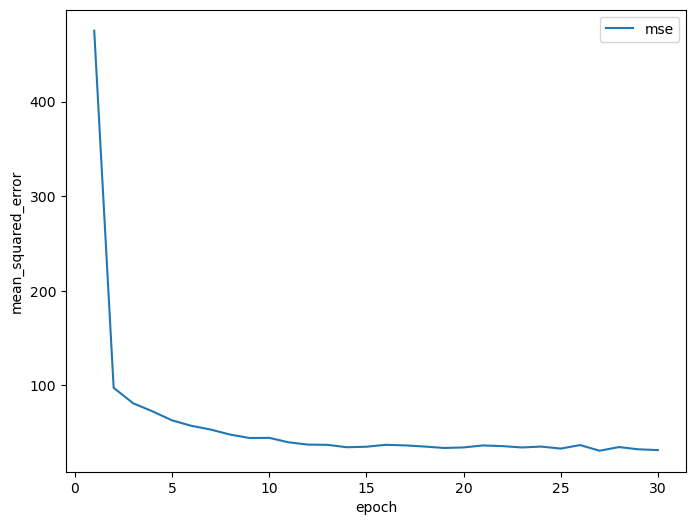

In [14]:
# MSE 학습 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])
plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()
# epoch가 진행될수록 MSE가 감소하는 것을 확인할 수 있다.

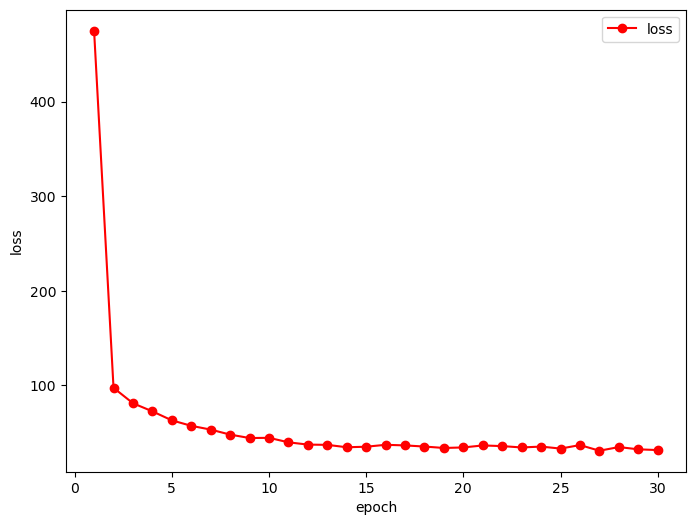

In [15]:
# 손실 그래프
plt.figure(figsize=[8, 6])
plt.plot(epoch, loss, 'r', marker='o', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
# 손실 확인 결과 에포크 진행 단계별로 손실이 점차 낮아지는 것을 볼 수 있다.

In [16]:
# 실제값, 예측값 데이터프레임 생성
pred_y = model.predict(X_te).flatten()
pred_y

4/4 [==============================] - 0s 3ms/step


2023-04-18 17:14:37.639762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([14.926873 , 17.681852 , 26.267515 ,  7.9176536, 15.005158 ,
       20.334684 , 11.632001 , 22.128695 , 13.236653 ,  7.8890834,
        5.115789 ,  9.617932 , 10.792657 ,  2.561948 , 33.26321  ,
       22.72695  , 13.689969 , 29.558775 , 24.675913 , 21.29933  ,
       22.893763 , 17.086325 , 16.023722 , 26.365953 , 21.479933 ,
       10.689126 , 17.37974  , 11.0042925, 28.34699  , 15.011762 ,
       10.714322 , 12.856984 , 17.735544 , 20.255526 , 24.82311  ,
       12.98763  ,  4.1403785, 16.951502 ,  6.411756 ,  6.421945 ,
       22.591528 , 18.94399  , 12.94563  ,  9.773438 , 17.00799  ,
       23.849695 , 16.264467 , 14.620774 ,  7.6369033, 20.45452  ,
        7.750215 , 11.07322  , 18.99206  , 22.40167  ,  7.765283 ,
       15.407399 , 17.322477 , 10.0682535, 14.9719095, 18.075174 ,
       16.162928 , 18.721216 , 24.999449 , 24.195585 ,  9.034802 ,
       24.184458 , 11.682733 , 13.969014 ,  8.437684 , 20.76814  ,
       15.780759 , 17.59318  , 26.882372 , 23.865835 , 16.9549

In [17]:
import pandas as pd

result_df = pd.DataFrame(pred_y, columns=['predict_val'])
result_df['real_val'] = y_te
result_df

,predict_val,real_val
0,14.926873,22.6
1,17.681852,50.0
2,26.267515,23.0
3,7.917654,8.3
4,15.005158,21.2
...,...,...
122,15.863919,19.4
123,17.590750,21.2
124,22.656435,20.3
125,18.330130,18.8


In [18]:
# 예측값을 기준으로 데이터프레임을 오름차순으로 정렬한다.
df_sort = result_df.sort_values(['predict_val'], ascending=True)
df_sort

,predict_val,real_val
116,-3.866294,8.4
96,-3.027407,13.8
75,-1.263049,7.4
106,-1.138484,10.4
13,2.561948,10.5
...,...,...
83,28.526926,44.8
17,29.558775,33.3
126,30.232405,33.4
14,33.263210,50.0


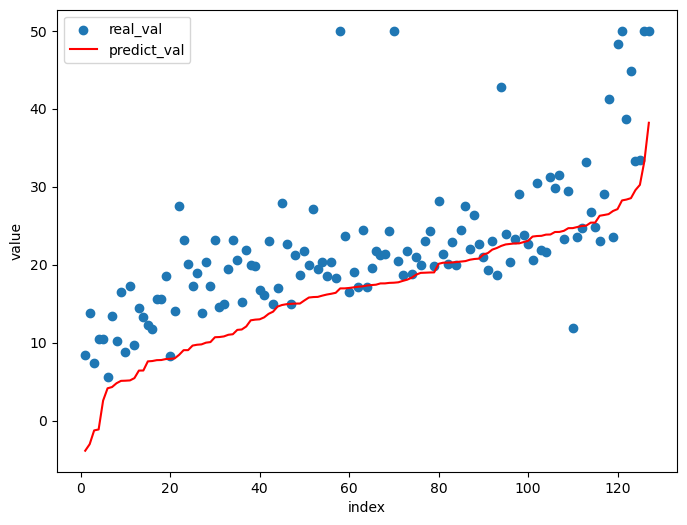

In [19]:
# 예측값, 실제값 비교 그래프
plt.figure(figsize=[8, 6])
idx = np.arange(1, len(df_sort) + 1)
plt.scatter(idx, df_sort['real_val'], marker='o', label='real_val')
plt.plot(idx, df_sort['predict_val'], color='r', label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()